In [1]:
import numpy as np

In [2]:
pip install fitz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.3 MB/s eta 0:00:00


In [3]:
pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 77.8 MB/s eta 0:00:00


In [4]:

from google.colab import files
uploaded = files.upload()

Saving Indian Rivers.pdf to Indian Rivers.pdf


In [5]:
import fitz
def extract_text(path):
    doc = fitz.open(path)
    text = ""
    for page in doc:
        text+=page.get_text()
    return text

path='Indian Rivers.pdf'
text_pdf=extract_text(path)
print(text_pdf)


Rivers of India
Rivers are the lifelines of India, weaving through its vast and diverse landscape, shaping its 
geography, culture, and economy. From the towering peaks of the Himalayas to the expansive 
deltas along the coast, India's rivers exhibit a remarkable diversity in their origins, courses, and 
significance.
The Ganges, revered as the holiest river in Hinduism, epitomizes the spiritual and cultural 
importance of rivers in India. Originating from the Gangotri Glacier in the Himalayas, the Ganges 
meanders through the plains of North India, passing through cities like Rishikesh, Varanasi, and 
Patna, before finally emptying into the Bay of Bengal. Its waters are believed to possess 
purifying properties, and millions of Hindus flock to its banks to perform rituals, take holy dips, 
and cremate their loved ones.
The Brahmaputra, one of the largest rivers in the world by discharge, begins its journey in Tibet 
as the Yarlung Tsangpo. Upon entering India through Arunachal Pradesh

In [6]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def text_preprocessing(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)  # Remove URLs
    words = word_tokenize(cleaned_text)
    sentences = sent_tokenize(cleaned_text)
    lowercase_words = [word.lower() for word in words]
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in lowercase_words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return lemmatized_words



preprocessed_text=text_preprocessing(text_pdf)
print(preprocessed_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['river', 'india', 'river', 'lifeline', 'india', 'weaving', 'vast', 'diverse', 'landscape', 'shaping', 'geography', 'culture', 'economy', 'towering', 'peak', 'himalaya', 'expansive', 'delta', 'along', 'coast', 'india', 'river', 'exhibit', 'remarkable', 'diversity', 'origin', 'course', 'significance', 'ganges', 'revered', 'holiest', 'river', 'hinduism', 'epitomizes', 'spiritual', 'cultural', 'importance', 'river', 'india', 'originating', 'gangotri', 'glacier', 'himalaya', 'ganges', 'meander', 'plain', 'north', 'india', 'passing', 'city', 'like', 'rishikesh', 'varanasi', 'patna', 'finally', 'emptying', 'bay', 'bengal', 'water', 'believed', 'posse', 'purifying', 'property', 'million', 'hindu', 'flock', 'bank', 'perform', 'ritual', 'take', 'holy', 'dip', 'cremate', 'loved', 'one', 'brahmaputra', 'one', 'largest', 'river', 'world', 'discharge', 'begin', 'journey', 'tibet', 'yarlung', 'tsangpo', 'upon', 'entering', 'india', 'arunachal', 'pradesh', 'cut', 'rugged', 'terrain', 'eastern', 'hima

In [7]:
import gensim
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize

cleaned_text = re.sub(r'http\S+', '', text_pdf)  # Remove URLs
sentences = sent_tokenize(cleaned_text)

data=[]
for i in sentences:
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)


# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, sg=0,window=5,workers=4)
#model1.wv.similarity('framework','rice')


In [15]:
import numpy as np
def embed_questions(questions, model):
    embedded_questions = []
    for question in questions:
        tokens = text_preprocessing(question)
        embeddings = [model.wv[token] for token in tokens if token in model.wv]
        if embeddings:
            embedded_questions.append(np.mean(embeddings, axis=0))
        else:
            embedded_questions.append(None)
    return embedded_questions

questions = ["Which is the largest river by discharge?", "What is the effect of annual floods in Brahmaputra region?", "What's posing serious health risks to millions dependent on these rivers?"]
embedded_questions=embed_questions(questions,model1)


In [16]:
def find_most_similar_answer(embedded_questions, sentences, model):
    answers = []
    for embedded_question in embedded_questions:
        if embedded_question is None:
            answers.append("Unable to process the question.")
        else:
            max_similarity = -1
            most_similar_sentence = None
            for sentence in sentences:
                tokens = text_preprocessing(sentence)
                embeddings = [model.wv[token] for token in tokens if token in model.wv]
                if embeddings:
                    sentence_embedding = np.mean(embeddings, axis=0)
                    similarity = np.dot(embedded_question, sentence_embedding) / (np.linalg.norm(embedded_question) * np.linalg.norm(sentence_embedding))
                    if similarity > max_similarity:
                        max_similarity = similarity
                        most_similar_sentence = sentence
            answers.append(most_similar_sentence)
    return answers

answers = find_most_similar_answer(embedded_questions, sentences, model1)

# Printing the answers
for question, answer in zip(questions, answers):
    print("Question:", question)
    print("Answer:", answer)
    print("----")


Question: Which is the largest river by discharge?
Answer: The Brahmaputra, one of the largest rivers in the world by discharge, begins its journey in Tibet 
as the Yarlung Tsangpo.
----
Question: What is the effect of annual floods in Brahmaputra region?
Answer: The annual floods 
bring both devastation and renewal to the region, depositing nutrient-rich silt that ensures 
bountiful harvests.
----
Question: What's posing serious health risks to millions dependent on these rivers?
Answer: Industrial effluents, 
agricultural runoff, and untreated sewage degrade water quality, posing serious health risks to 
millions dependent on these rivers.
----


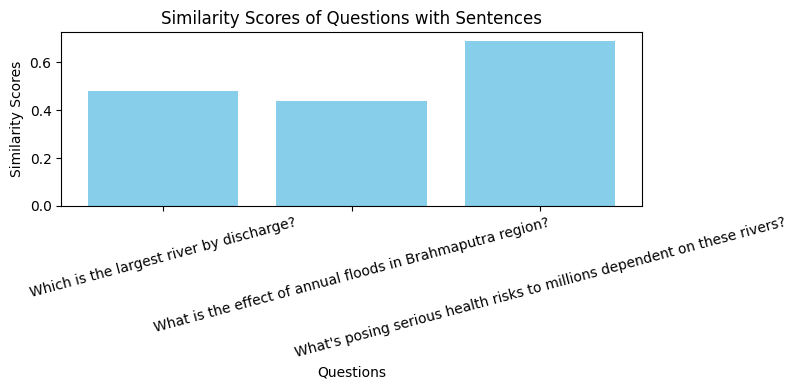

In [24]:
import matplotlib.pyplot as plt

# Calculate similarity scores for each question
similarity_scores = []
for embedded_question in embedded_questions:
    max_similarity = -1
    for sentence in sentences:
        tokens = text_preprocessing(sentence)
        embeddings = [model1.wv[token] for token in tokens if token in model1.wv]
        if embeddings:
            sentence_embedding = np.mean(embeddings, axis=0)
            similarity = np.dot(embedded_question, sentence_embedding) / (np.linalg.norm(embedded_question) * np.linalg.norm(sentence_embedding))
            if similarity > max_similarity:
                max_similarity = similarity
    similarity_scores.append(max_similarity)

# Plotting bar plot
plt.figure(figsize=(8, 4))
plt.bar(range(len(questions)), similarity_scores, color='skyblue')
plt.xlabel('Questions')
plt.ylabel('Similarity Scores')
plt.title('Similarity Scores of Questions with Sentences')
plt.xticks(range(len(questions)), questions, rotation=15)
plt.tight_layout()
plt.savefig('similarity_scores_barplot.png')  # Save the plot
plt.show()



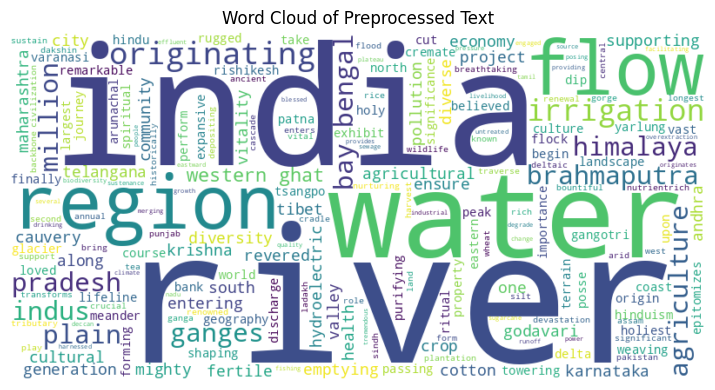

In [25]:
from wordcloud import WordCloud

# Join preprocessed text into a single string
text_for_wordcloud = ' '.join(preprocessed_text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plotting word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Text')
plt.tight_layout()
plt.savefig('wordcloud.png')  # Save the word cloud
plt.show()


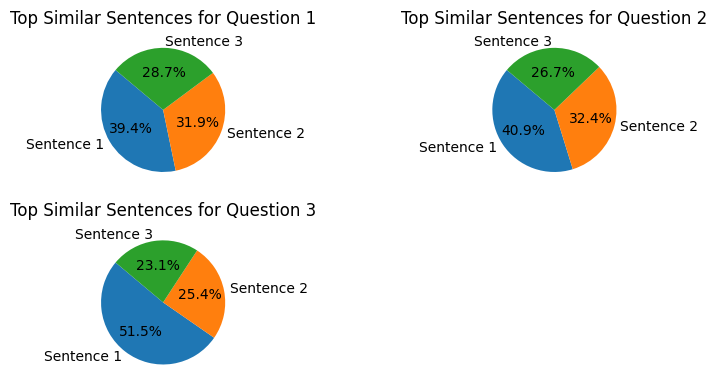

In [23]:
# Calculate top most similar sentences for each question
top_sentences = []
for embedded_question in embedded_questions:
    similarities = []
    for sentence in sentences:
        tokens = text_preprocessing(sentence)
        embeddings = [model1.wv[token] for token in tokens if token in model1.wv]
        if embeddings:
            sentence_embedding = np.mean(embeddings, axis=0)
            similarity = np.dot(embedded_question, sentence_embedding) / (np.linalg.norm(embedded_question) * np.linalg.norm(sentence_embedding))
            similarities.append((sentence, similarity))

    # Sort sentences by similarity and get top 3
    top_sentences.append(sorted(similarities, key=lambda x: x[1], reverse=True)[:3])

# Plotting pie charts for top most similar sentences
plt.figure(figsize=(8, 4))
for i, (question, top_similarities) in enumerate(zip(questions, top_sentences), start=1):
    labels = [f'Sentence {j+1}' for j in range(len(top_similarities))]
    values = [similarity for sentence, similarity in top_similarities]

    plt.subplot(2, 2, i)
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top Similar Sentences for Question {i}')

plt.tight_layout()
plt.savefig('top_similar_sentences_piecharts.png')  # Save the plot
plt.show()
